<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/Curso_Python_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import seaborn as sns

In [37]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/curso_scikitlearn/aula1/Passageiros.csv')
passageiros.head(3)

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132


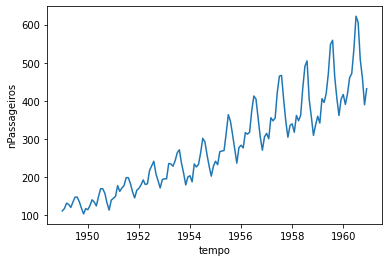

In [38]:
sns.lineplot(x='tempo', y='nPassageiros', data=passageiros);

In [39]:
Tempo = passageiros.iloc[:,:-1].values

In [40]:
nPassageiros = passageiros.iloc[:,1].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, test_size = 0.3)

In [43]:
from sklearn import linear_model

In [44]:
regressor = linear_model.LinearRegression()

In [45]:
regressor.fit(Tempo_treino, nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [47]:
import numpy as np

In [48]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito})

In [49]:
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_teste})

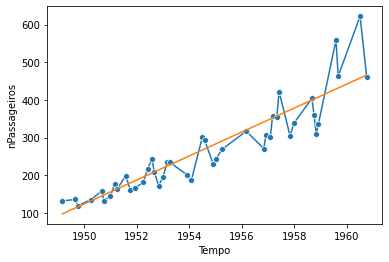

In [50]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)

In [51]:
regressor.coef_

array([31.81478853])

In [52]:
regressor.intercept_

-61914.812590461865

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8266588467747962

In [55]:
from sklearn.svm import SVR

In [56]:
regressor_svr = SVR(C=10000)

In [57]:
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [59]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito_svr})

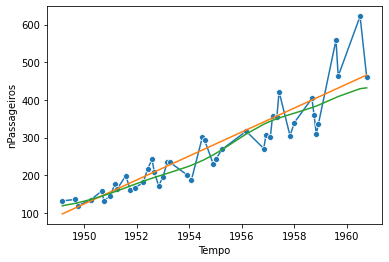

In [60]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito_svr)

In [61]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8165022480321605

In [62]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8266588467747962

# Nova base de dados

In [86]:
celular = pd.read_csv('https://github.com/alura-cursos/curso_scikitlearn/raw/aula3/Celular.csv')
celular.sample(3)

,salario,economias,idade,dividas,plano
100,6.3,3.3,6.0,2.5,3
104,6.5,3.0,5.8,2.2,3
125,7.2,3.2,6.0,1.8,3


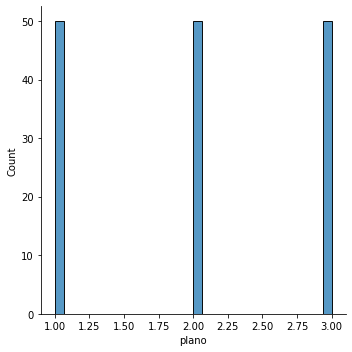

In [87]:
sns.displot(celular.plano, bins=30);

In [88]:
X = celular.iloc[:,:-1].values

In [89]:
y = celular.iloc[:,4].values

In [90]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [91]:
from sklearn import tree

In [92]:
classificador_arvore = tree.DecisionTreeClassifier()

In [93]:
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
import graphviz

In [95]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)

In [96]:
graph = graphviz.Source(dot_data)

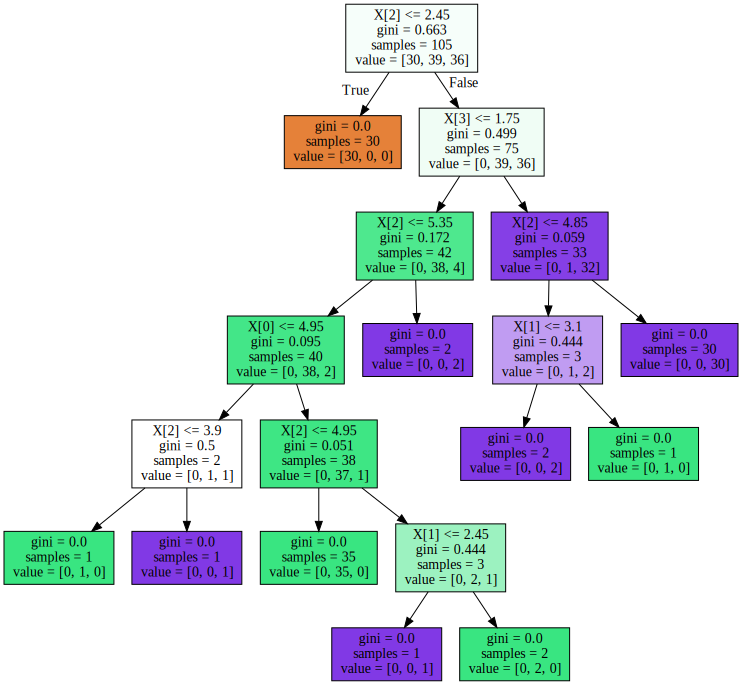

In [97]:
graph

In [98]:
plano_previsto = classificador_arvore.predict(X_teste)

In [99]:
plano_previsto

array([2, 3, 3, 2, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3,
       1, 2, 1, 2, 2, 2, 3, 1, 2, 1, 3, 3, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1,
       3])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


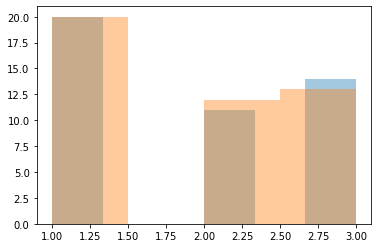

In [100]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=4, kde=False);

In [101]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(y_teste, plano_previsto)*100

97.77777777777777

In [103]:
 from sklearn.neighbors import KNeighborsClassifier

In [104]:
classificador_vizinho = KNeighborsClassifier(5)

In [106]:
classificador_vizinho.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
plano_previsto_v = classificador_vizinho.predict(X_teste)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


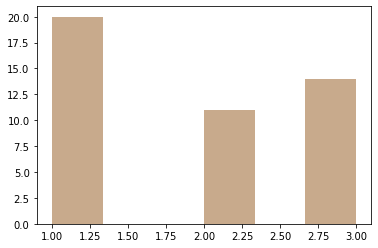

In [108]:
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

In [109]:
accuracy_score(y_teste, plano_previsto_v)*100

100.0

In [111]:
plano_previsto_v2 = classificador_vizinho.predict(X_treino)

In [115]:
accuracy_score(y_treino, plano_previsto_v2)*100

95.23809523809523

In [116]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [117]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
params = {'n_neighbors': [5]}

In [120]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=skfold, verbose=1, scoring='accuracy', return_train_score=True)

In [121]:
gs.fit(X,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [122]:
gs.cv_results_['mean_test_score']

array([0.964])

In [123]:
engajamento = pd.read_csv('https://github.com/alura-cursos/curso_scikitlearn/raw/aula4/Engajamento.csv')

In [125]:
engajamento.sample(3)

,Horas,Taxa de Cliques,Classe
640,1006.621250,-0.269385,1
194,997.782564,14.215821,0
3471,991.019593,3.813698,2


In [126]:
X = engajamento.iloc[:,:-1]

In [127]:
X

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
...,...,...
4995,991.447007,5.428443
4996,996.841049,15.504041
4997,991.723479,4.750185
4998,996.695706,14.807956


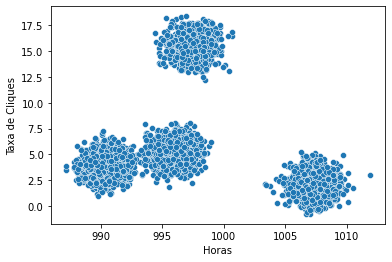

In [128]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X)

In [129]:
from sklearn.cluster import KMeans

In [130]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [131]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [132]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

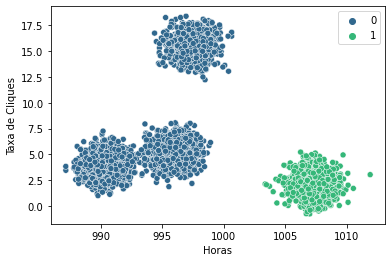

In [133]:
sns.scatterplot(x="Horas", y='Taxa de Cliques', data=X, hue=kmeans.labels_, palette='viridis')

In [134]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [136]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

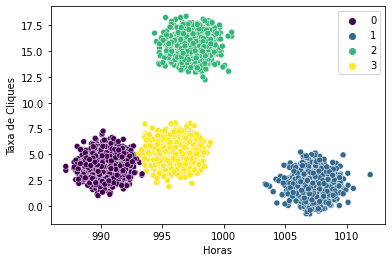

In [137]:
sns.scatterplot(x="Horas", y='Taxa de Cliques', data=X, hue=kmeans.labels_, palette='viridis')

In [138]:
from sklearn.cluster import  OPTICS

In [146]:
clustering_o = OPTICS(min_samples=120).fit(X)

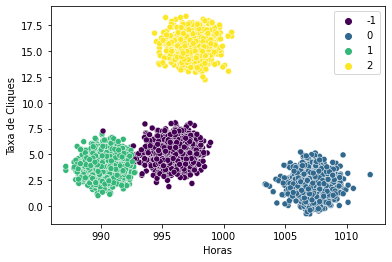

In [147]:
sns.scatterplot(x="Horas", y='Taxa de Cliques', data=X, hue=clustering_o.labels_, palette='viridis')

In [148]:
from sklearn import metrics

In [151]:
Classe_conhecida = engajamento.Classe

In [152]:
Classe_estimada = clustering_o.labels_

In [153]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9936269634329947

In [154]:
Classe_estimada = kmeans.labels_

In [155]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9957444328155858

In [157]:
metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')

0.7640009351490763

In [158]:
metrics.silhouette_score(X, clustering_o.labels_, metric='euclidean')

0.7632551907047529